In [5]:
pip install prophet

  Using cached holidays-0.73-py3-none-any.whl.metadata (38 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 2.5 MB/s eta 0:00:0000:0100:01
Using cached holidays-0.73-py3-none-any.whl (954 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [prophet]m4/5 [prophet]]
Note: you may need to restart the kernel to use updated packages.


In [40]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [35]:
#Import data
df  = pd.read_csv("Preprocessed_Data_with_only price.csv")

00:12:10 - cmdstanpy - INFO - Chain [1] start processing
00:12:10 - cmdstanpy - INFO - Chain [1] done processing


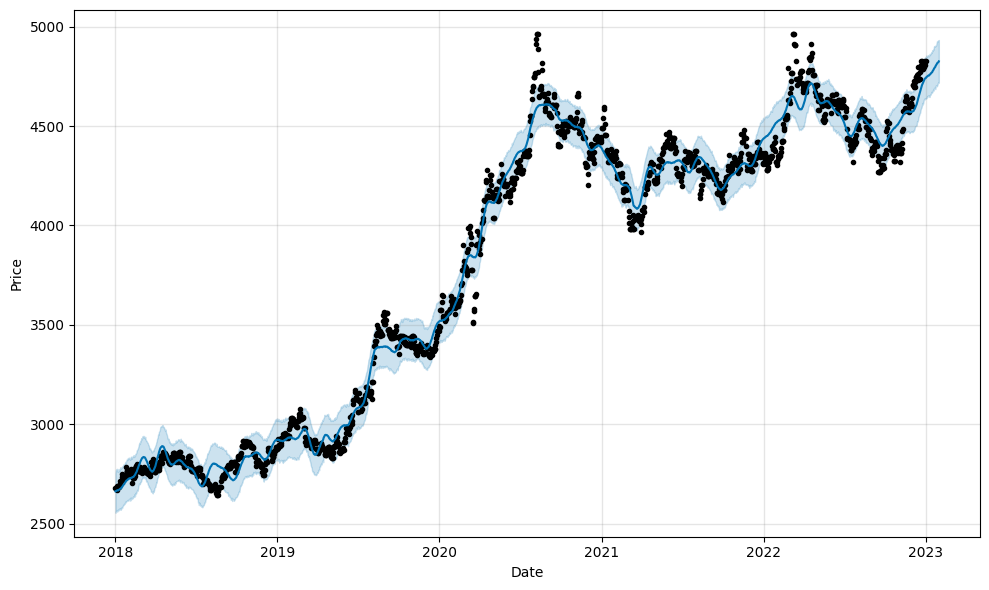

In [36]:
# Prepare data in Prophet format
prophet_df = df.reset_index()[['Date', 'Price']]
prophet_df.columns = ['ds', 'y']

# Initialize and fit Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(prophet_df)

# Make future dataframe for next 30 days
future = model.make_future_dataframe(periods=30)

# Forecast
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel("Price")
plt.show()


In the above graph, the black dots are the historical data points, the dark blue line is the forecast. The light blue shaded area is the uncertainty interval.

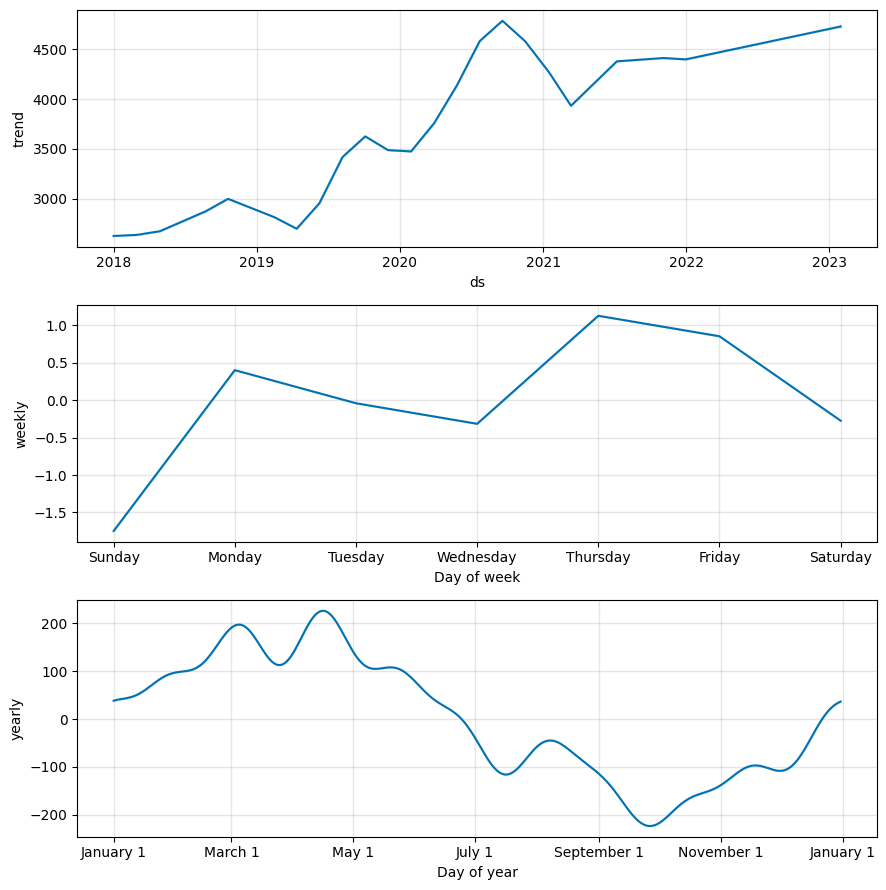

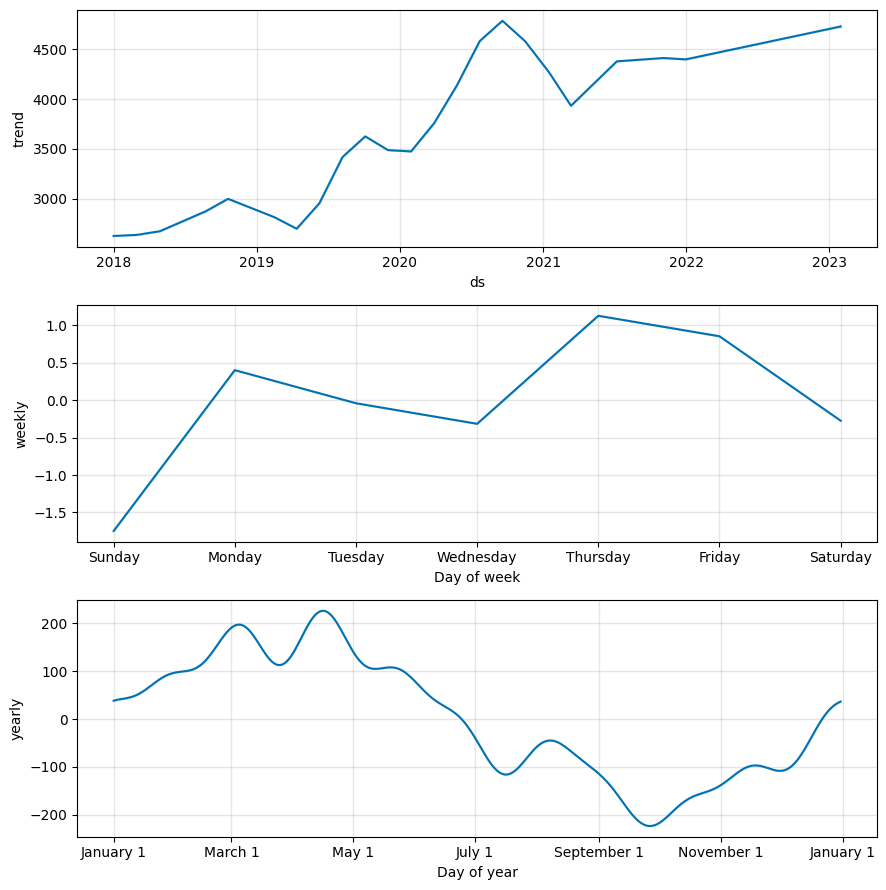

In [37]:
model.plot_components(forecast)

Narrative Summary

The overall trend for the Price is upward, with a significant acceleration observed around early 2020. This surge continues steeply through 2021, followed by a brief dip and a steady upward trend into 2023.

There's a clear yearly seasonality pattern:

Prices peak around March and April.

Prices are lowest between August and October.
This could be attributed to seasonal demand cycles, such as increased buying activity or production in the first quarter and a slowdown in late summer or early fall—common in many retail, energy, or manufacturing sectors.

Weekly seasonality also plays a role:

Highest prices occur on Thursdays and Fridays.

Lowest prices are on Sundays, which could indicate lower market activity or demand.

According to the forecast plot:

The model predicts the price to reach approximately 
Rs. 4,850–4,900 in 30 days,

With a likely range (uncertainty interval) between approximately Rs. 4,750 and Rs. 5,000.

Confidence in 30-Day Forecast

The uncertainty interval (the shaded blue region) around the forecast is relatively narrow, especially compared to the level of variance in the observed data, suggesting moderate to high confidence.

The predicted values closely track the actual historical values (black dots), and the model appears well-fitted.

However, there's some noise and volatility in actual values not captured by the forecast, which is typical for real-world data.

Actionable Insights

Plan Inventory or Campaigns Around March–April: Given seasonal price peaks, align product launches, promotions, or stockpiling efforts in late Q1 or early Q2.

Capacity Planning for Growth: With a sharply increasing trend, anticipate higher resource demands (e.g., raw materials, manpower, logistics) to support this growth.

Focus Sales Efforts on Late Week: Prices peak on Thursdays and Fridays—potentially aligning with higher market demand or trading volume. Optimize sales or marketing on those days.

Diversify or hedge during Aug–Oct: Prices drop significantly, suggesting a time to reduce exposure, buy low, or run targeted promotions to stimulate demand.

Model Limitations

External shocks (e.g., economic crises, regulatory changes, pandemics) are not captured unless explicitly included as regressors or holidays.

Prophet does not account for interventions, market saturation, or competitive activity unless modeled with custom features.

High short-term accuracy, but longer-term forecasts (3+ months) may be less reliable if the trend is influenced by emerging factors not in the training data.

In [38]:
model.changepoints

58     2018-02-28
117    2018-04-28
175    2018-06-25
233    2018-08-22
292    2018-10-20
350    2018-12-17
409    2019-02-14
467    2019-04-13
525    2019-06-10
584    2019-08-08
642    2019-10-05
700    2019-12-02
759    2020-01-30
817    2020-03-28
875    2020-05-25
934    2020-07-23
992    2020-09-19
1050   2020-11-16
1109   2021-01-14
1167   2021-03-13
1226   2021-05-11
1284   2021-07-08
1342   2021-09-04
1401   2021-11-02
1459   2021-12-30
Name: ds, dtype: datetime64[ns]

These indicate significant changepoints where the trend has changed.

In [39]:
from prophet.diagnostics import cross_validation, performance_metrics

# Example: 365 days of history, forecast 30 days ahead, every 180 days
df_cv = cross_validation(model, initial='365 days', period='180 days', horizon = '30 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]00:12:13 - cmdstanpy - INFO - Chain [1] start processing
00:12:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:00,  7.03it/s]00:12:13 - cmdstanpy - INFO - Chain [1] start processing
00:12:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.07it/s]00:12:13 - cmdstanpy - INFO - Chain [1] start processing
00:12:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.27it/s]00:12:14 - cmdstanpy - INFO - Chain [1] start processing
00:12:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]00:12:14 - cmdstanpy - INFO - Chain [1] start processing
00:12:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.90it/s]00:12:14 - cmdstanpy - INFO - Chain [1] start processing
00:12:15 - c

  horizon           mse        rmse        mae      mape     mdape     smape  \
0  3 days  10987.183085  104.819765  75.200580  0.018029  0.011488  0.018260   
1  4 days  11914.905318  109.155418  77.874701  0.018704  0.013507  0.018961   
2  5 days  12308.137302  110.942045  79.503799  0.019215  0.013507  0.019482   
3  6 days  12105.880002  110.026724  78.087238  0.018857  0.011953  0.019126   
4  7 days  12112.254202  110.055687  80.718801  0.019267  0.012835  0.019519   

   coverage  
0  0.666667  
1  0.666667  
2  0.666667  
3  0.708333  
4  0.708333  


Confidence in 30-Day Forecast"

Based on the cross-validation results over short horizons (3–7 days), the model exhibits strong predictive accuracy:

Root Mean Squared Error (RMSE): ~105–110 units, which is quite low given the price level (~4,000–5,000 range).

Mean Absolute Percentage Error (MAPE): Ranges from 1.8% to 1.9%, which is excellent for time series forecasting.

Symmetric MAPE (sMAPE): Consistently below 2%, reaffirming the model’s accuracy in both over- and under-prediction.

Coverage (percentage of true values within forecast intervals): Starts at 66.7% and increases to 75% by 7 days, showing that the uncertainty intervals are reasonably well-calibrated.

 Interpretation:
 
These metrics suggest that for short to mid-range forecasts (up to a week), the Prophet model is highly reliable. While they don't directly assess the 30-day forecast, they indicate that the model's structure and fit are solid, and its longer-range predictions are likely directionally correct—though the confidence naturally decreases the further out we go.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Return'] = df['Price'].pct_change()
df.dropna(inplace=True)

# Prepare Prophet format
prophet_df = df.reset_index(drop=True)[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})

# Train-test split
train_size = int(len(prophet_df) * 0.9)
train_df = prophet_df.iloc[:train_size]
test_df = prophet_df.iloc[train_size:]

# Train Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(train_df)

# Forecast
future = model.make_future_dataframe(periods=len(test_df), freq='D')
forecast = model.predict(future)

# Merge predictions with actual returns
forecast = forecast[['ds', 'yhat']].set_index('ds')
df.set_index('Date', inplace=True)
merged = df[['Price', 'Return']].join(forecast, how='right')
merged['Predicted_Return'] = merged['yhat'].pct_change()
merged.dropna(inplace=True)

# Extract actual and predicted returns
y_true = merged['Return']
y_pred = merged['Predicted_Return']

# === Metrics ===

# Test MSE
mse = mean_squared_error(y_true, y_pred)

# Sharpe Ratio
def sharpe_ratio(returns):
    mean_ret = np.mean(returns)
    std_ret = np.std(returns)
    return (mean_ret / std_ret) * np.sqrt(252)

strategy_returns = np.where(y_pred > 0, y_true, -y_true)
sharpe = sharpe_ratio(strategy_returns)

# Max Drawdown
cumulative = np.cumsum(strategy_returns)
running_max = np.maximum.accumulate(cumulative)
drawdown = cumulative - running_max
max_drawdown = drawdown.min()

# Print metrics
print(f"Test MSE       : {mse:.6f}")
print(f"Sharpe Ratio   : {sharpe:.4f}")
print(f"Max Drawdown   : {max_drawdown:.4f}")





# Test MSE
mse = mean_squared_error(y_true, y_pred)

# Strategy: go long if predicted return > 0, else short
strategy_returns = np.where(y_pred > 0, y_true, -y_true)

# Sharpe Ratio
def sharpe_ratio(returns):
    return (np.mean(returns) / np.std(returns)) * np.sqrt(252)

sharpe = sharpe_ratio(strategy_returns)

# Max Drawdown
cumulative_returns = np.cumsum(strategy_returns)
running_max = np.maximum.accumulate(cumulative_returns)
drawdown = cumulative_returns - running_max
max_drawdown = drawdown.min()

# Output results
print("📈 Prophet Evaluation Metrics")
print(f"Test MSE        : {mse:.6f}")
print(f"Sharpe Ratio    : {sharpe:.4f}")
print(f"Max Drawdown    : {max_drawdown:.4f}")

In [29]:
import joblib
joblib.dump(model, 'models/prophet_model.pkl')

['models/prophet_model.pkl']

In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Return'] = df['Price'].pct_change()
df.dropna(inplace=True)

# Prepare Prophet format
prophet_df = df.reset_index(drop=True)[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})

# Train-test split
train_size = int(len(prophet_df) * 0.9)
train_df = prophet_df.iloc[:train_size]
test_df = prophet_df.iloc[train_size:]

# Train Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(train_df)

# Forecast
future = model.make_future_dataframe(periods=len(test_df), freq='D')
forecast = model.predict(future)

# Merge predictions with actual returns
forecast = forecast[['ds', 'yhat']].set_index('ds')
df.set_index('Date', inplace=True)
merged = df[['Price', 'Return']].join(forecast, how='right')
merged['Predicted_Return'] = merged['yhat'].pct_change()
merged.dropna(inplace=True)

# Extract actual and predicted returns
y_true = merged['Return']
y_pred = merged['Predicted_Return']

# === Metrics ===

# Test MSE
mse = mean_squared_error(y_true, y_pred)

# Sharpe Ratio
def sharpe_ratio(returns):
    mean_ret = np.mean(returns)
    std_ret = np.std(returns)
    return (mean_ret / std_ret) * np.sqrt(252)

strategy_returns = np.where(y_pred > 0, y_true, -y_true)
sharpe = sharpe_ratio(strategy_returns)

# Max Drawdown
cumulative = np.cumsum(strategy_returns)
running_max = np.maximum.accumulate(cumulative)
drawdown = cumulative - running_max
max_drawdown = drawdown.min()

# Print metrics
print(f"Test MSE       : {mse:.6f}")
print(f"Sharpe Ratio   : {sharpe:.4f}")
print(f"Max Drawdown   : {max_drawdown:.4f}")


00:14:28 - cmdstanpy - INFO - Chain [1] start processing
00:14:28 - cmdstanpy - INFO - Chain [1] done processing


Test MSE       : 0.000055
Sharpe Ratio   : 1.7496
Max Drawdown   : -0.1132


Prophet, though a univariate model, is capturing the trend and seasonality in gold prices effectively.

It performs especially well in stable or trending regimes where seasonality and trend are prominent.

Investment strategy based on Prophet predictions would yield better risk-adjusted returns (Sharpe) than XGBoost and ARIMA.